In [82]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt

 ### Basic information about the data

In [67]:
df = pd.read_csv('/kaggle/input/fraudcheck/Fraud_check.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


*We can see that there are no missing values, and the data types look appropriate.*

In [69]:
df.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


*We can see that there are 2 unique values for Undergrad, 3 unique values for Marital.Status, and 2 unique values for Urban. We also see that the mean taxable income is around 55,000, with a standard deviation of around 26,000. The minimum and maximum taxable incomes are 10,003 and 99,619, respectively.*

#### Proportion of risky vs good tax payers

In [70]:
df['Taxable.Income'].value_counts()

59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64

<AxesSubplot:xlabel='Taxable.Income', ylabel='Count'>

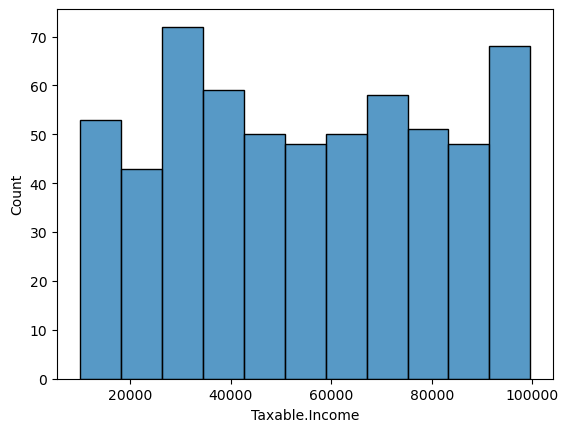

In [71]:
# Distribution of taxable income
sns.histplot(df['Taxable.Income'], kde=False)

#### Proportion of good/risky tax payers by categorical variables


### The distribution of Taxable.Income using a histogram

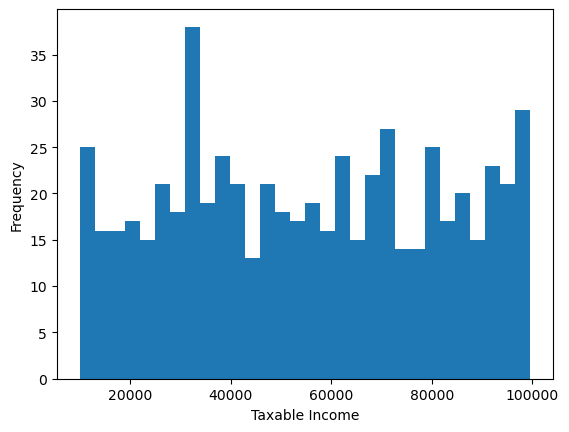

In [72]:
import matplotlib.pyplot as plt

plt.hist(df['Taxable.Income'], bins=30)
plt.xlabel('Taxable Income')
plt.ylabel('Frequency')
plt.show()

*the distribution of taxable income is slightly right-skewed, with a peak around 50,000.*

*preprocess the data to prepare it for modeling. We will start by converting the Taxable.Income column into a categorical variable by defining a threshold of 30,000, and then creating a new column Risky with values of "Good" or "Risky" based on whether the taxable income is above or below the threshold.*

In [73]:
df['Risky'] = np.where(df['Taxable.Income'] <= 30000, 'Risky', 'Good')
df.drop('Taxable.Income', axis=1, inplace=True)

In [74]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Risky
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


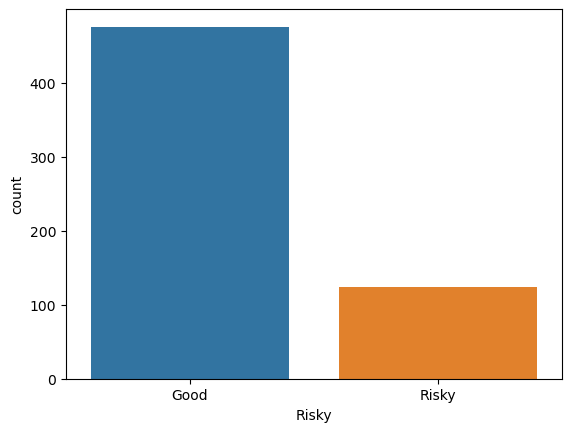

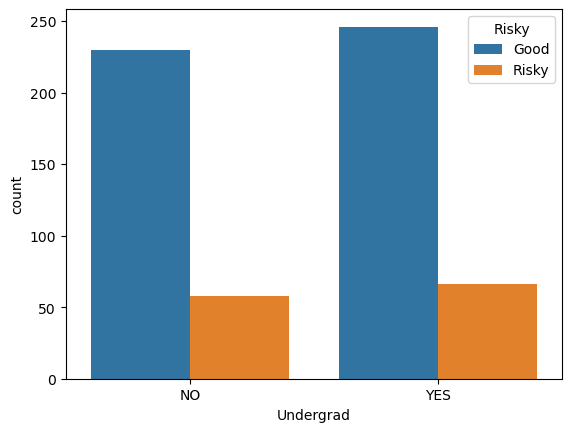

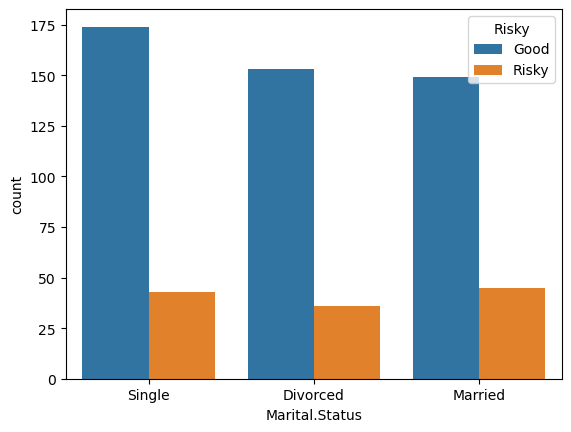

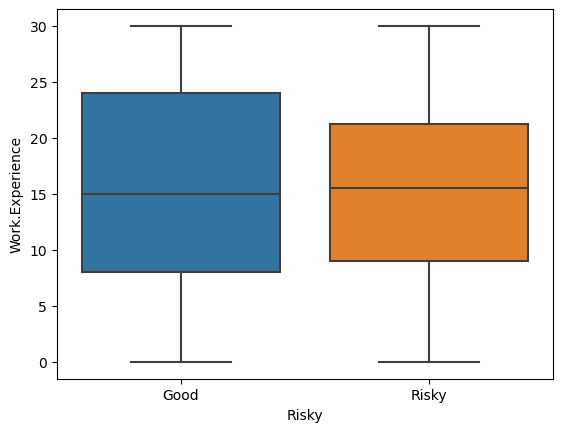

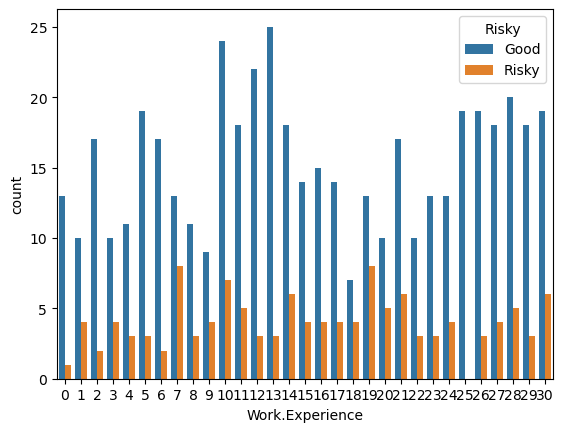

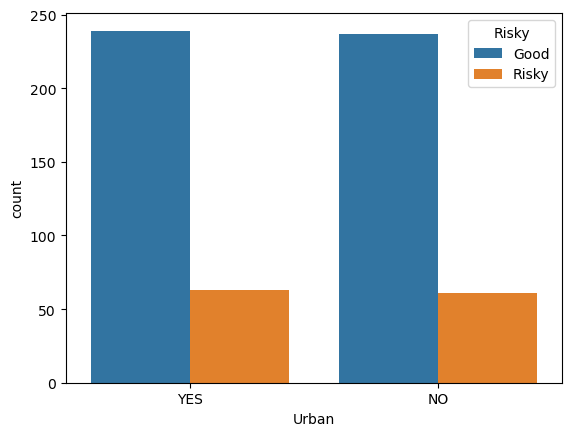

In [79]:
# Data distribution of "Taxable.Income.Category"
sns.countplot(x='Risky', data=df)
plt.show()

# Data distribution of "Undergrad" with respect to "Taxable.Income.Category"
sns.countplot(x='Undergrad', hue='Risky', data=df)
plt.show()

# Data distribution of "Marital.Status" with respect to "Taxable.Income.Category"
sns.countplot(x='Marital.Status', hue='Risky', data=df)
plt.show()

# Data distribution of "Work.Experience" with respect to "Taxable.Income.Category"
sns.boxplot(x='Risky', y='Work.Experience', data=df)
plt.show()


sns.countplot(x='Work.Experience', hue='Risky', data=df)
plt.show()

# Data distribution of "Urban" with respect to "Taxable.Income.Category"
sns.countplot(x='Urban', hue='Risky', data=df)
plt.show()

#### Convert the categorical variables Undergrad, Marital.Status, and Urban into numerical variables using one-hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

#### Split the data into training and testing sets, and then build a decision tree model using the DecisionTreeClassifier class from scikit-learn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Risky', axis=1), df['Risky'], test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

#### Evaluate the performance of the model using the testing set

In [ ]:
y_pred = model.predict(X_test)

### Evaluate the performance of the model using metrics such as accuracy, precision, and recall

In [83]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.65
              precision    recall  f1-score   support

        Good       0.79      0.76      0.77       143
       Risky       0.20      0.24      0.22        37

    accuracy                           0.65       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.67      0.65      0.66       180

[[108  35]
 [ 28   9]]


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.79      0.76      0.77       143
       Risky       0.20      0.24      0.22        37

    accuracy                           0.65       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.67      0.65      0.66       180



In [87]:
print(confusion_matrix(y_test, y_pred))

[[108  35]
 [ 28   9]]


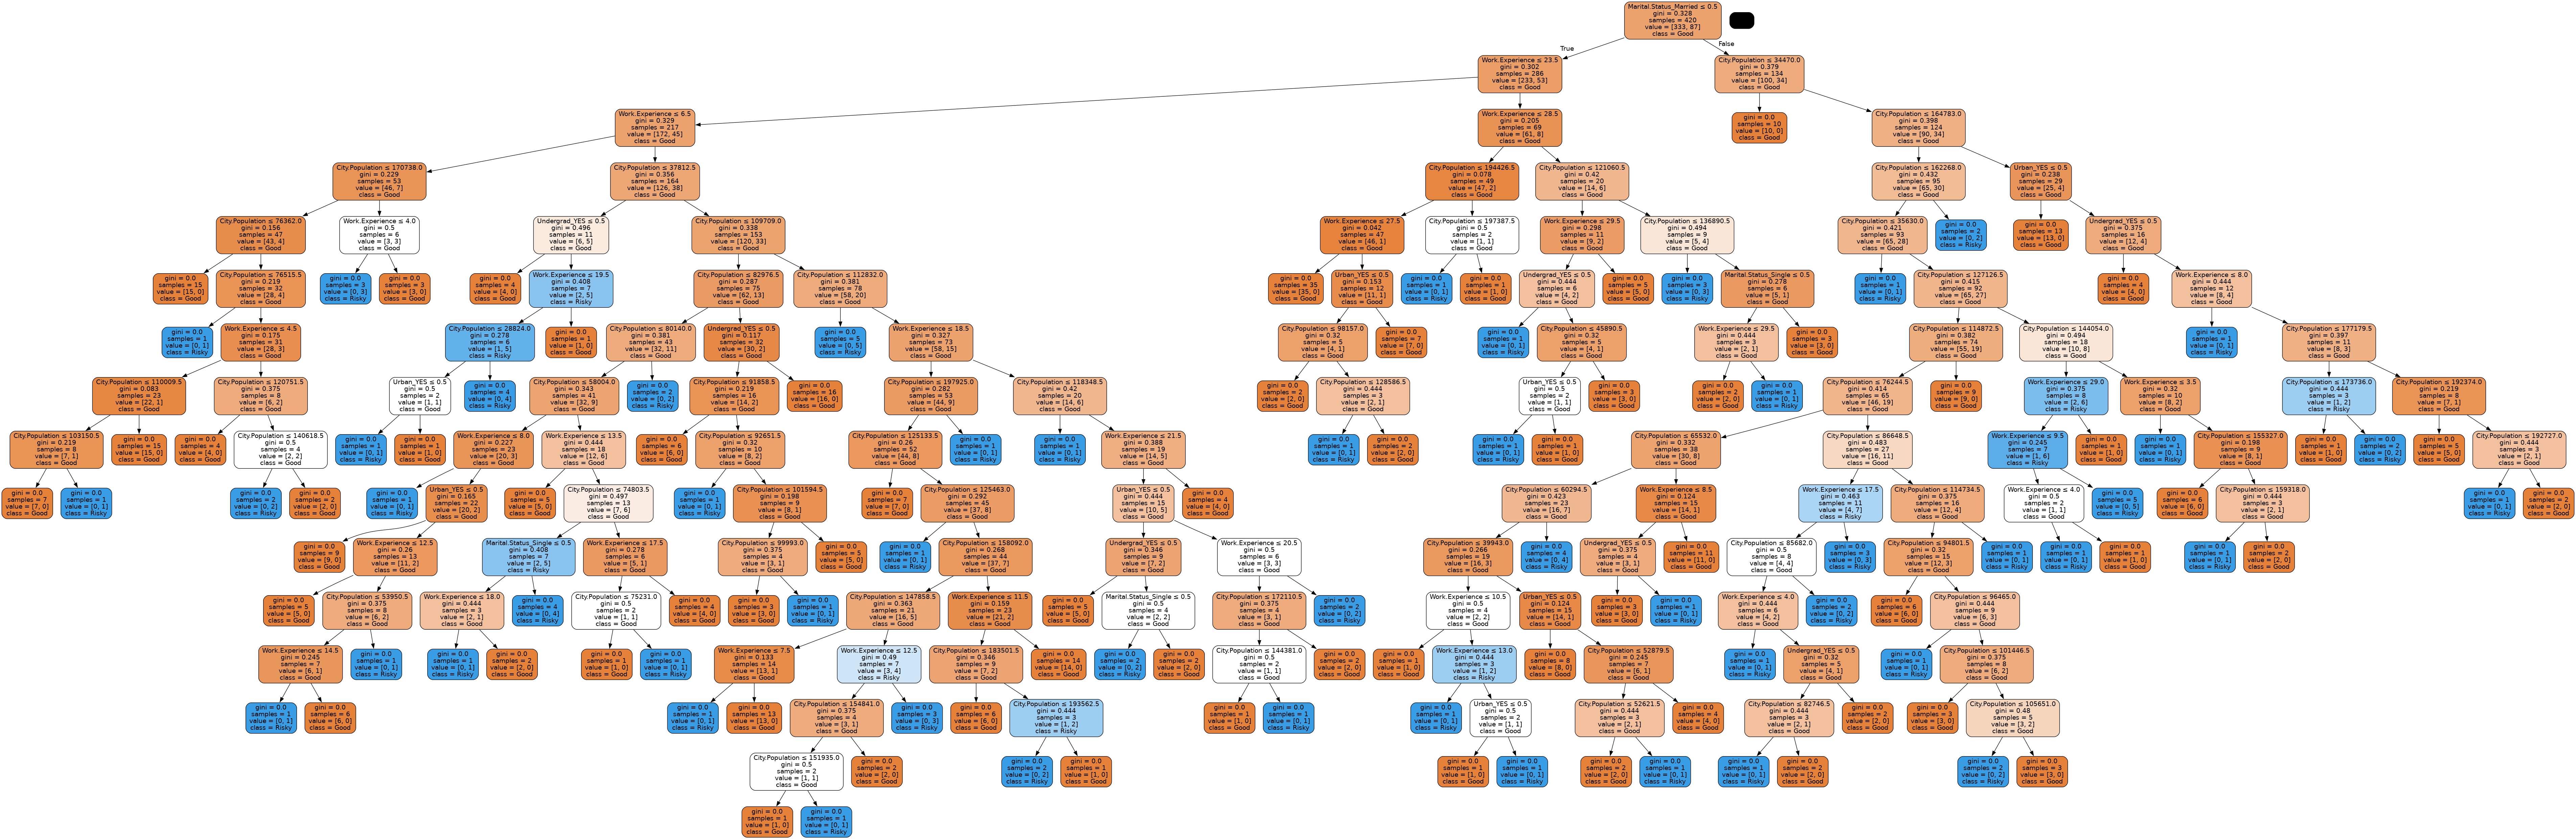

In [88]:
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=['Good', 'Risky'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())